# Automatic Locator Change Prediction

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("C:\\Users\\ajita.patel\\Downloads\\Autohealers_Xpath_Locators_attributes_Training_Data (1).csv")

In [4]:
df.head(5)

,Tag,Type,Placeholder,ID,Value,Class,Classification
0,input,text,Enter User Name,txtUserName,username,login-control-css,1
1,input,password,Enter the Password,txtPwd,password,login-control-css,1
2,input,submit,a-button-input,btnSubmit,Submit,form-control,1
3,input,button,a-button-input,btnCancel,Cancel,form-control,1
4,input,text,UserName,login,log-in,form-control,1


# Data Understanding

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
Tag               1140 non-null object
Type              1021 non-null object
Placeholder       931 non-null object
ID                769 non-null object
Value             797 non-null object
Class             708 non-null object
Classification    1140 non-null int64
dtypes: int64(1), object(6)
memory usage: 62.5+ KB


(1140, 7)

In [6]:
df.columns

Index(['Tag', 'Type', 'Placeholder', 'ID', 'Value', 'Class', 'Classification'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
Tag               1140 non-null object
Type              1021 non-null object
Placeholder       931 non-null object
ID                769 non-null object
Value             797 non-null object
Class             708 non-null object
Classification    1140 non-null int64
dtypes: int64(1), object(6)
memory usage: 62.5+ KB


1    610
0    530
Name: Classification, dtype: int64

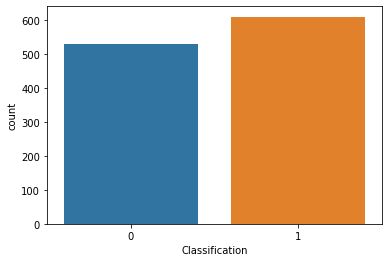

In [8]:
df['Classification'].value_counts()
sns.countplot(df.Classification)

input     932
button    177
a          20
div        11
Name: Tag, dtype: int64

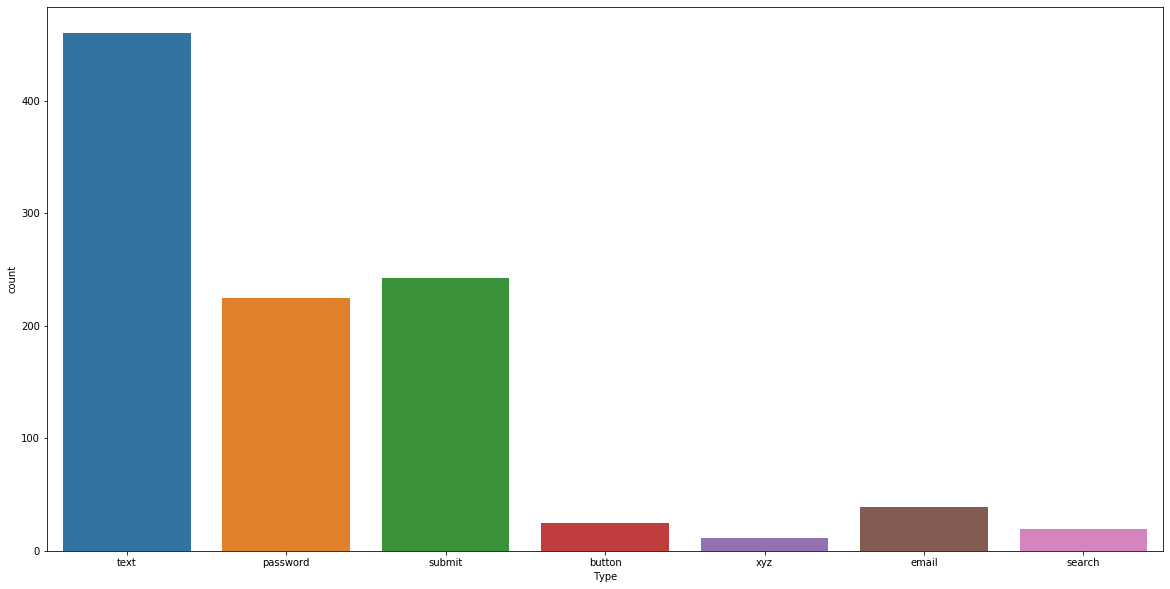

In [9]:
df['Tag'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(df.Type)

text        460
submit      242
password    225
email        39
button       25
search       19
xyz          11
Name: Type, dtype: int64

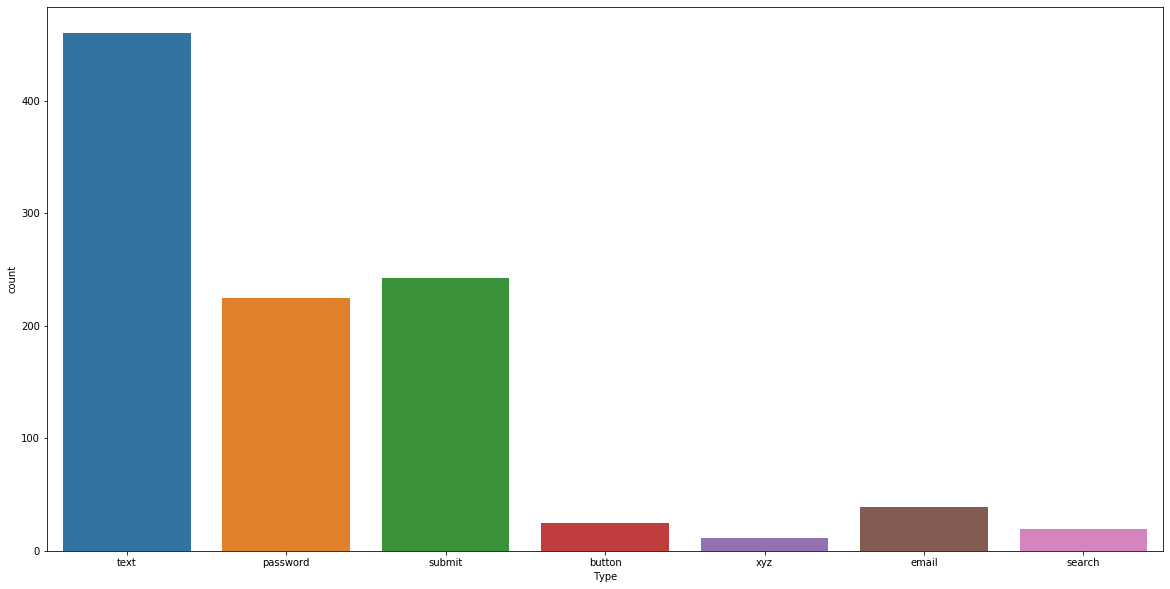

In [10]:
df['Type'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(df.Type)

a-button-input                                              97
_16qL6K _366U7Q                                             95
inputtext _58mg _5dba _2ph-                                 81
_2zrpKA                                                     78
inputtext                                                   40
a-input-text a-span12 auth-autofocus auth-required-field    38
booking large                                               22
action-button M12A                                          22
_42ft _4jy0 _52e0 _4jy6 _4jy1 selected _51sy                22
fl button                                                   22
_3y9b  _1wLi _2vdF                                          21
User                                                        20
_2zrpKA _3v41xv                                             20
UserName                                                    20
IP signInInp b-email                                        19
a-input-text hide                                      

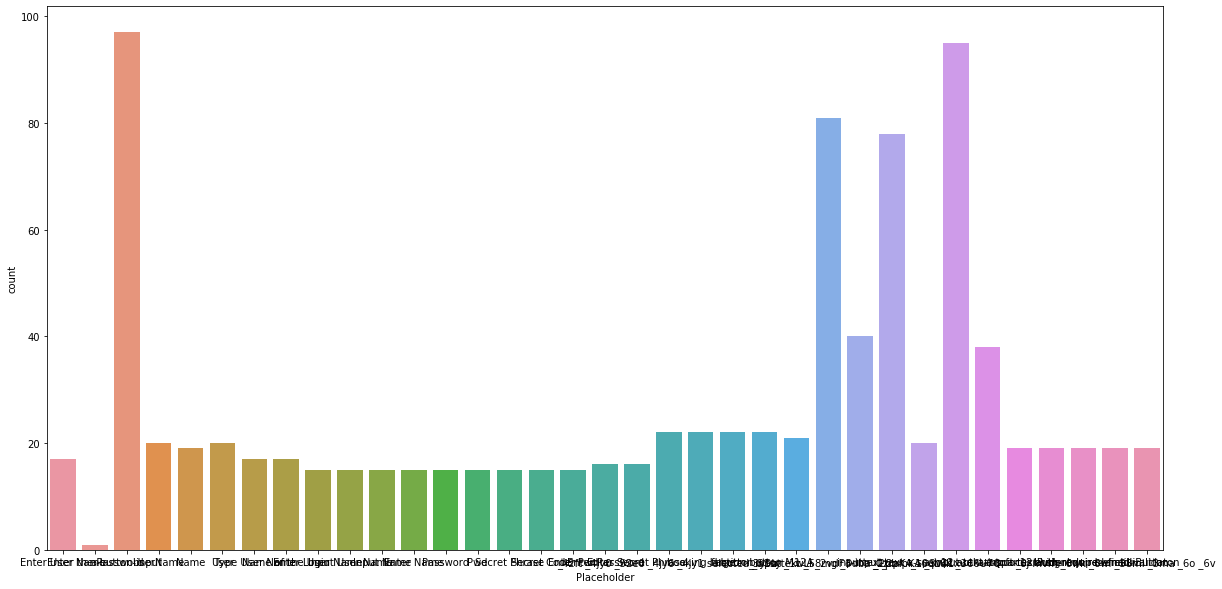

In [11]:
df['Placeholder'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(df.Placeholder)

text        460
submit      242
password    225
email        39
button       25
search       19
xyz          11
Name: Type, dtype: int64

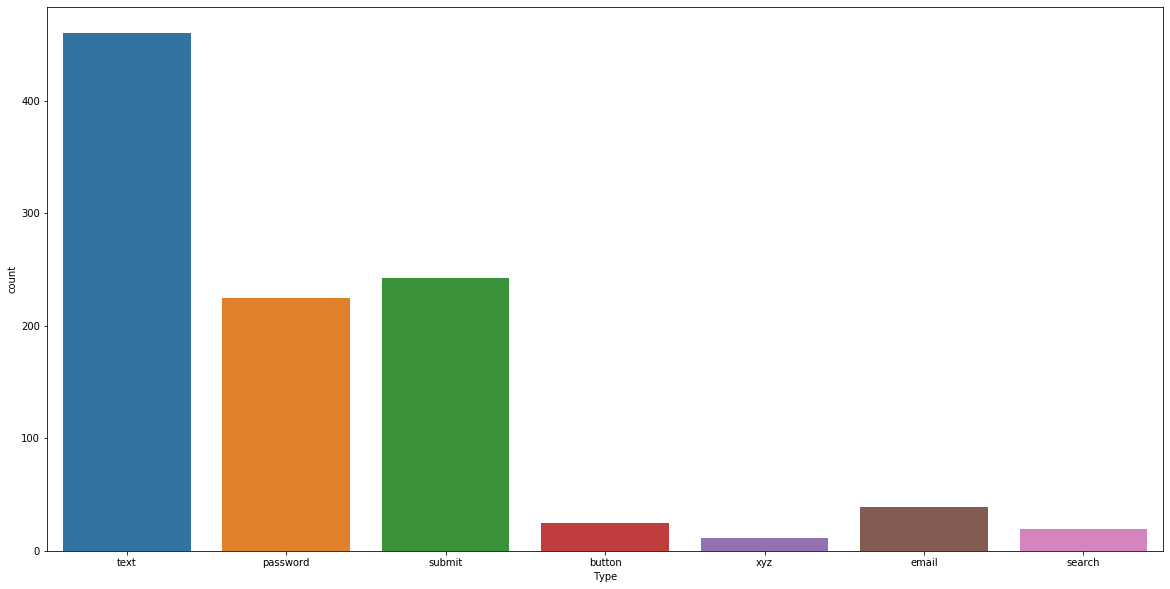

In [12]:
df['Type'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(data = df, x = 'Type')

log-in                                     158
password                                    63
Enter here                                  38
Sign-In                                     37
websubmit                                   36
submit                                      31
Submit                                      23
login                                       20
reg_email__                                 20
pass                                        20
reg_passwd__                                20
lastname                                    20
firstname                                   19
OK                                          19
pincode                                     18
secondaryLoginClaim                         18
did_submit                                  18
address-ui-widgets-enterAddressFullName     18
name                                        18
customerName                                18
email                                       18
proceedToChec

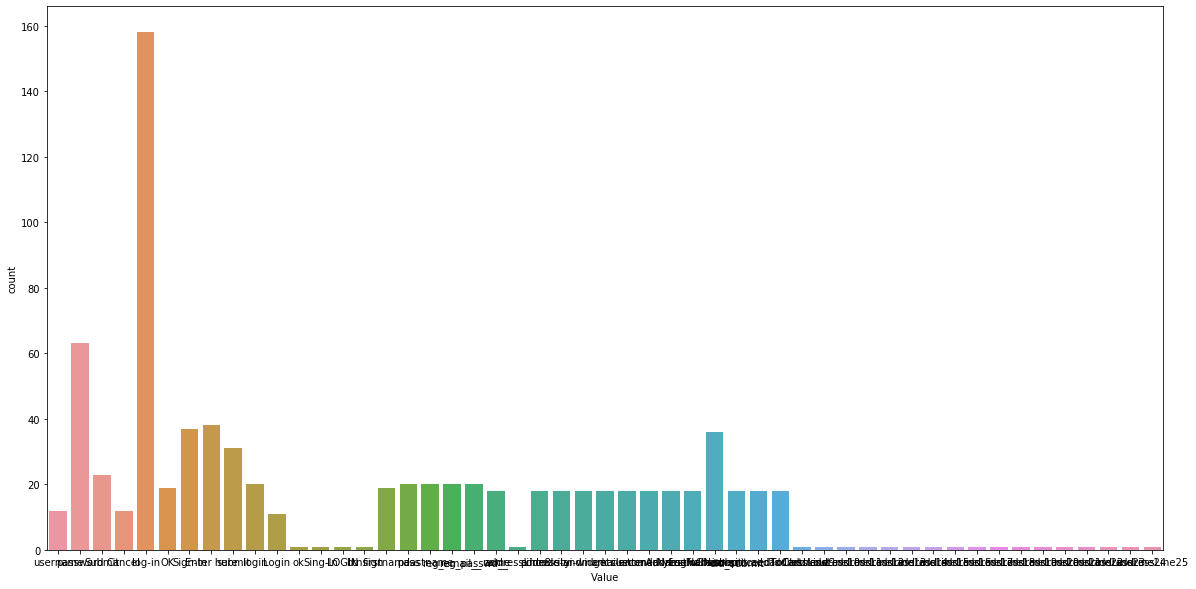

In [13]:
df['Value'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(df.Value)

form-control                               133
login-control-css                           43
pwd-control-style                           42
login-field-css                             25
ap-credential-autofill-hint                 22
doSignin                                    22
ap_customer_name                            22
address-ui-widgets-enterAddressFullName     22
email-mobile                                22
ap_password                                 22
createAccountSubmit                         22
ap_email                                    22
continue                                    22
signInSubmit                                22
copyReferCode                               22
search_btn                                  22
loginbutton                                 20
email                                       20
SearchBtn                                   20
pass                                        20
login-button-style                          16
btn btn-prima

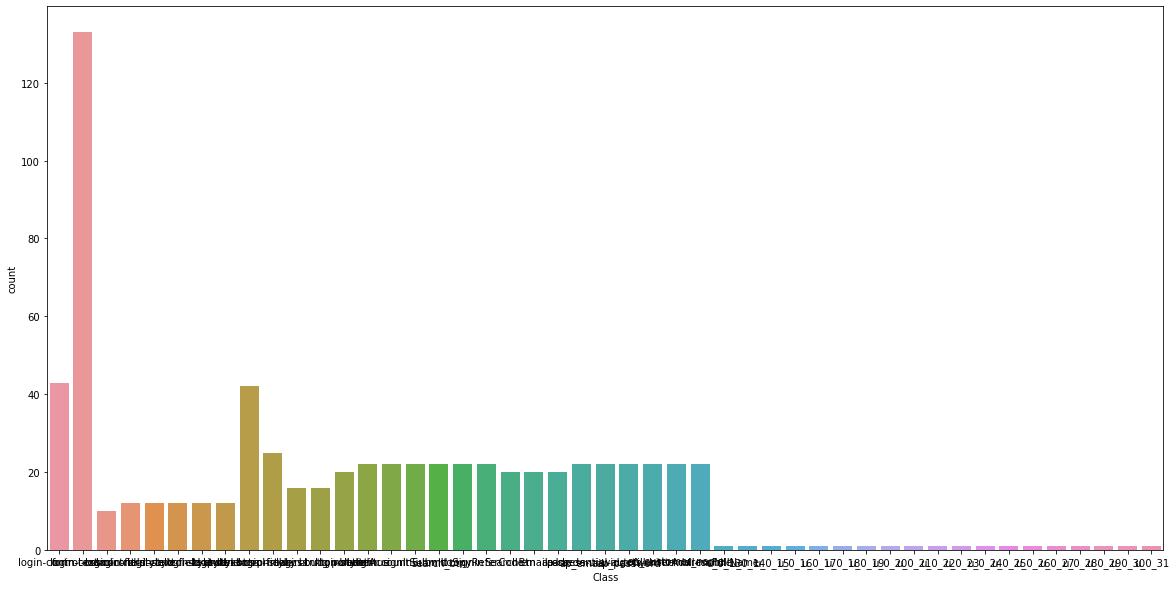

In [14]:
df['Class'].value_counts()
fig = plt.figure(figsize = (20,10))
sns.countplot(df.Class)

In [15]:
#pd.crosstab(df['Tag'],df['Classification']).T.style.background_gradient(cmap='summer_r')
#pd.crosstab(df['Type'],df['Classification']).T.style.background_gradient(cmap='summer_r')

pd.crosstab(df['Tag'],df['Classification'])
pd.crosstab(df['Type'],df['Classification'])

#pd.crosstab(df['ID'],df['Classification'])
#pd.crosstab(df['Placeholder'],df['Classification'])

Classification,0,1
Tag,,
a,5,15
button,68,109
div,11,0
input,446,486


Classification,0,1
Type,,
button,0,25
email,34,5
password,28,197
search,19,0
submit,74,168
text,295,165
xyz,11,0


In [16]:
import missingno as msno
#msno.bar(df1,figsize = (10, 5))
df.isnull().sum()



Tag                 0
Type              119
Placeholder       209
ID                371
Value             343
Class             432
Classification      0
dtype: int64

In [17]:
#msno.bar(df, color="green", log=True, figsize=(15,10))

# Data Preparation

df['ID'].fillna(df['ID'].mode()[0], inplace=True)
df['Value'].fillna(df['Value'].mode()[0], inplace=True)
df['Class'].fillna(df['Class'].mode()[0], inplace=True)

In [18]:
df['NoMissingcolumn'] = df.isnull().sum(axis=1) # add a new column

In [19]:
df.head()

,Tag,Type,Placeholder,ID,Value,Class,Classification,NoMissingcolumn
0,input,text,Enter User Name,txtUserName,username,login-control-css,1,0
1,input,password,Enter the Password,txtPwd,password,login-control-css,1,0
2,input,submit,a-button-input,btnSubmit,Submit,form-control,1,0
3,input,button,a-button-input,btnCancel,Cancel,form-control,1,0
4,input,text,UserName,login,log-in,form-control,1,0


In [20]:
df['Missingvalue'] = np.where((df.NoMissingcolumn >= 1), 1, df.NoMissingcolumn)
df.tail(10)



,Tag,Type,Placeholder,ID,Value,Class,Classification,NoMissingcolumn,Missingvalue
1130,input,submit,booking large,Ok,NaN,SearchBtn,1,1,1
1131,input,text,inputtext _58mg _5dba _2ph-,Sign In,firstname,NaN,0,1,1
1132,input,email,inputtext,Enter,NaN,email,0,1,1
1133,input,password,inputtext,Submit,pass,pass,1,0,0
1134,input,text,inputtext _58mg _5dba _2ph-,Click to Enter,lastname,NaN,0,1,1
1135,input,text,inputtext _58mg _5dba _2ph-,Click to Login,reg_email__,NaN,0,1,1
1136,input,password,inputtext _58mg _5dba _2ph-,Click to Sign In,reg_passwd__,NaN,1,1,1
1137,input,text,_2zrpKA,login,NaN,NaN,0,2,1
1138,input,password,_2zrpKA _3v41xv,login,NaN,NaN,0,2,1
1139,input,text,_2zrpKA,login,NaN,NaN,0,2,1


msno.heatmap(df, figsize=(10,10))

In [21]:
#pd.get_dummies(data, columns=['Tag'])
data=pd.get_dummies(df)

In [22]:
data.head()

,Classification,NoMissingcolumn,Missingvalue,Tag_a,Tag_button,Tag_div,Tag_input,Type_button,Type_email,Type_password,...,Class_u_0_22,Class_u_0_23,Class_u_0_24,Class_u_0_25,Class_u_0_26,Class_u_0_27,Class_u_0_28,Class_u_0_29,Class_u_0_30,Class_u_0_31
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
x = data.drop(['Classification','NoMissingcolumn','Missingvalue'], axis =1 , inplace = False)
y = data ['Classification']


In [24]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size =0.25 ,random_state=42 , stratify =y)

# Models

# Random Forest Classifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_prediction = rf.predict(x_test)

In [28]:
accuracy_score(rf_prediction, y_test)

0.9157894736842105

In [29]:
target_prob_rf = rf.predict_proba(x_test)[:,1]
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, target_prob_rf)

# K-Nearest Neighbor

In [30]:
knn_model = KNeighborsClassifier()

In [31]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
knn_prediction = knn_model.predict(x_test)

In [33]:
accuracy_score(knn_prediction, y_test)

0.9122807017543859

In [34]:
target_prob_knn = knn_model.predict_proba(x_test)[:,1]

In [35]:
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, target_prob_knn)

# Logistic Regression

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_prediction = log_model.predict(x_test)

In [39]:
accuracy_score(log_prediction, y_test)

0.8982456140350877

In [40]:
target_prob_log = log_model.predict_proba(x_test)[:,1]

In [41]:
log_fpr, log_tpr, log_thresh = roc_curve(y_test, target_prob_log)

# Naive Bayes

In [42]:
gn = GaussianNB()

In [43]:
gn_model = gn.fit(x_train, y_train)

In [44]:
gn_prediction = gn_model.predict(x_test)

In [45]:
accuracy_score(gn_prediction, y_test)

0.9263157894736842

In [46]:
target_prob_gn = gn_model.predict_proba(x_test)[:,1]

In [47]:
gn_fpr, gn_tpr, gn_thresh = roc_curve(y_test, target_prob_gn)

# XG Boost

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [49]:
gbc = XGBClassifier()

In [50]:
param_grid = {'max_depth': [3,10,15,20] , 'min_child_weight': [5,10,15,20], "learning_rate": [0.05,0.1,0.2],
             'n_estimators':[100,200,300]}

gbc = XGBClassifier()
gbc_g = RandomizedSearchCV(gbc,param_grid,cv =5,verbose =2 , n_jobs=-1)
gbc_model=gbc.fit(x_train, y_train)


In [51]:
gbc_prediction = gbc_model.predict(x_test)

In [52]:
accuracy_score(gbc_prediction, y_test)

0.8596491228070176

In [53]:
target_prob_gbc = gbc_model.predict_proba(x_test)[:,1]

In [54]:
gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_test, target_prob_gn)

# Plot ROC

In [55]:
log_auc_score = roc_auc_score(y_test, target_prob_log)
gn_auc_score = roc_auc_score(y_test, target_prob_gn)
rf_auc_score = roc_auc_score(y_test, target_prob_rf)
knn_auc_score = roc_auc_score(y_test, target_prob_knn)
gbc_auc_score = roc_auc_score(y_test, target_prob_gbc)

In [56]:
log_auc_score 
gn_auc_score
rf_auc_score 
knn_auc_score
gbc_auc_score

0.971210922041947

0.9596111990502572

0.9488771270280967

0.9420261179263949

0.957409972299169

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'ROC CURVES')

Text(0, 0.5, 'TRUE POSITIVE RATE')

Text(0.5, 0, 'FALSE POSITIVE RATE')

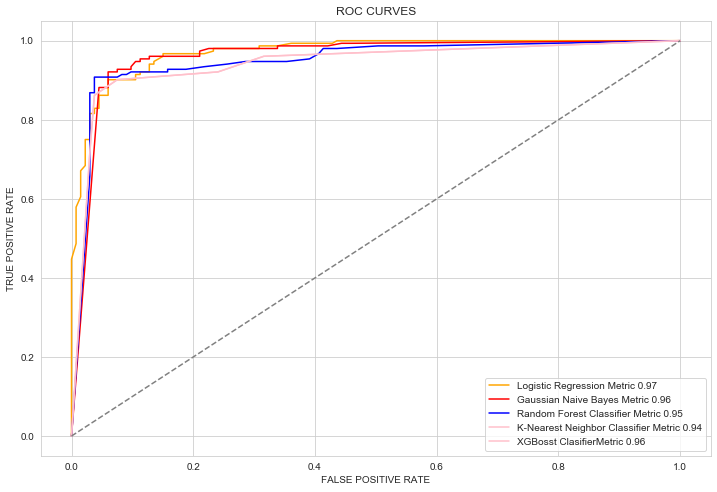

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.title('ROC CURVES')
plt.plot(log_fpr, log_tpr, color='orange', label='Logistic Regression Metric {:.2}'.format(log_auc_score))
plt.plot(gn_fpr, gn_tpr, color='red', label='Gaussian Naive Bayes Metric {:.2}'.format(gn_auc_score))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest Classifier Metric {:.2}'.format(rf_auc_score))
plt.plot(knn_fpr, knn_tpr, color='pink', label='K-Nearest Neighbor Classifier Metric {:.2}'.format(knn_auc_score))
plt.plot(knn_fpr, knn_tpr, color='pink', label='XGBosst ClasifierMetric {:.2}'.format(gbc_auc_score))
plt.plot([0, 1], ls='--', color='grey')
plt.ylabel('TRUE POSITIVE RATE')
plt.xlabel('FALSE POSITIVE RATE')
plt.legend()
plt.show()

# Classification reports

In [58]:
print(classification_report(y_test, log_prediction))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       133
           1       0.89      0.92      0.91       152

    accuracy                           0.90       285
   macro avg       0.90      0.90      0.90       285
weighted avg       0.90      0.90      0.90       285



In [59]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       133
           1       0.93      0.90      0.92       152

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285



In [60]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       133
           1       0.93      0.91      0.92       152

    accuracy                           0.92       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.92      0.92      0.92       285



In [61]:
print(classification_report(y_test, gn_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       133
           1       0.95      0.91      0.93       152

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285



In [62]:
print(classification_report(y_test, gbc_prediction))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       133
           1       0.82      0.94      0.88       152

    accuracy                           0.86       285
   macro avg       0.87      0.85      0.86       285
weighted avg       0.87      0.86      0.86       285



<Figure size 432x288 with 0 Axes>

Confusion Matrix


array([[116,  12],
       [ 17, 140]], dtype=int64)

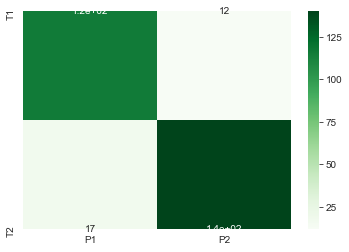

In [63]:
from sklearn import metrics
#Confusion Matrix
plt.figure(figsize=(6,4))
print("Confusion Matrix")
cf = metrics.confusion_matrix(log_prediction,y_test)
lb1 = ['P1','P2']
lb2 = ['T1','T2']
sns.heatmap(cf,annot=True, cmap="Greens", xticklabels=lb1 ,yticklabels=lb2)
#plt.show()
cf

array([[116,  12],
       [ 17, 140]], dtype=int64)

Text(34.0, 0.5, 'True label')

Text(0.5, 16.0, 'Predicted label')

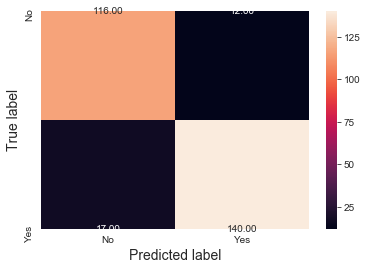

In [64]:
cm = metrics.confusion_matrix(log_prediction,y_test)
cm
import seaborn as sns
#cf = metrics.confusion_matrix(log_prediction,y_test)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)

In [65]:
cf1 = metrics.confusion_matrix(knn_prediction,y_test)
cf2 = metrics.confusion_matrix(rf_prediction,y_test)
cf3 = metrics.confusion_matrix(gn_prediction,y_test)
cf4 = metrics.confusion_matrix(gbc_prediction,y_test)

In [66]:
cf1
cf2
cf3
cf4

array([[123,  15],
       [ 10, 137]], dtype=int64)

array([[123,  14],
       [ 10, 138]], dtype=int64)

array([[125,  13],
       [  8, 139]], dtype=int64)

array([[102,   9],
       [ 31, 143]], dtype=int64)

In [67]:
rf.feature_importances_

array([2.27815754e-03, 1.39392909e-02, 7.86462865e-03, 1.30778578e-02,
       1.35224946e-02, 8.39296703e-03, 4.25814394e-02, 8.32315040e-03,
       3.61635717e-02, 5.81249753e-02, 7.45734970e-03, 4.08890385e-03,
       7.60720741e-03, 9.45710098e-06, 9.16448665e-04, 6.72061476e-04,
       1.07367076e-02, 0.00000000e+00, 1.03604473e-02, 2.61247201e-03,
       2.10718774e-03, 5.86954924e-03, 2.82005449e-03, 0.00000000e+00,
       1.83496553e-04, 7.68082938e-04, 7.10274898e-04, 2.89597533e-03,
       4.50451162e-03, 4.43031128e-03, 5.69584820e-02, 3.89364742e-02,
       1.37534631e-02, 5.58798044e-03, 3.51664011e-03, 3.61332048e-03,
       4.23241572e-03, 6.79882623e-03, 4.63095786e-03, 1.72977027e-03,
       1.08613977e-02, 3.72774808e-03, 3.10202312e-03, 4.21594808e-03,
       8.68468834e-03, 1.55613064e-02, 6.83157011e-04, 5.13218370e-03,
       7.20165836e-03, 1.67043877e-03, 2.93205299e-03, 1.28332461e-02,
       3.89305012e-03, 0.00000000e+00, 6.81469251e-03, 2.98669612e-03,
      

In [70]:
log_model.coef_

array([[ 0.82385578,  0.49441755, -1.81754244, -0.19574434,  1.40093825,
        -0.64192707,  2.00931073, -1.07668208,  0.79863593, -0.58178561,
        -1.21486355,  0.9278355 ,  1.20860887,  0.32628509,  0.29379232,
         0.36786298,  1.11410715,  0.03392229, -0.88325769,  0.83714181,
         0.92695821,  0.31628999,  1.10333215,  0.24373002,  0.21839428,
         0.29697263,  0.25871171,  0.95092175,  0.45647733,  0.12811767,
        -2.22101064, -1.35238659, -2.0737834 , -0.44207218,  0.54732999,
         0.6809826 , -0.02188537, -0.0255124 , -0.77882162,  0.6188771 ,
         1.34847162, -0.47221455, -0.09153954,  0.43978619, -0.37964687,
        -1.80528035,  0.5108971 ,  1.03112883,  0.87030428,  0.20219992,
         0.81846378,  0.64736506,  0.8762181 ,  0.13968967, -1.15002197,
        -0.1870095 ,  0.51164323, -0.96601076,  0.69073329,  0.03878901,
         0.72296522,  0.2793414 ,  0.12730352,  0.30854036,  0.01404067,
         0.34033906,  0.11047404,  0.45788561,  0.4

In [71]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis =1)
coeff.columns = ('Variable','Coeff')
values= coeff.sort_values('Variable',ascending =True)
values.head(10)

,Variable,Coeff
121,Class_SearchBtn,-0.640489
122,Class_address-ui-widgets-enterAddressFullName,-0.946922
123,Class_ap-credential-autofill-hint,0.413658
124,Class_ap_customer_name,-1.048848
125,Class_ap_email,-0.984103
126,Class_ap_password,0.795110
127,Class_btn btn-primary btn-lg pull-right,1.247003
128,Class_continue,-0.263867
129,Class_copyReferCode,-0.904121
130,Class_createAccountSubmit,0.637730


In [72]:
from sklearn.externals import joblib
joblib.dump(log_model, 'model.pkl')

['model.pkl']

In [73]:
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']